In [1]:
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ['DejaVu Serif']
plt.rcParams['font.size'] = 6

In [34]:
def plot_steps(data, plots_titles):
    
    fig, axes = plt.subplots(2, 5, figsize=(10, 5), dpi=300)
    
    plt.subplots_adjust(wspace=0.1, hspace=0.15)
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i], cmap='gray')
        ax.set_title(plots_titles[i])
        ax.set_xticks([])
        ax.set_yticks([])
    plt.savefig("figura.png")
    plt.show()

def data_standardization(data):

    mean = np.mean(data)
    std_dev = np.std(data)
    data = (data - mean) / std_dev # standardization
    
    data = np.clip(data, -3, 3) # Clip the outliers

    min_val = np.min(data)
    max_val = np.max(data)

    data = 2 * (data - min_val) / (max_val - min_val) - 1

    return data

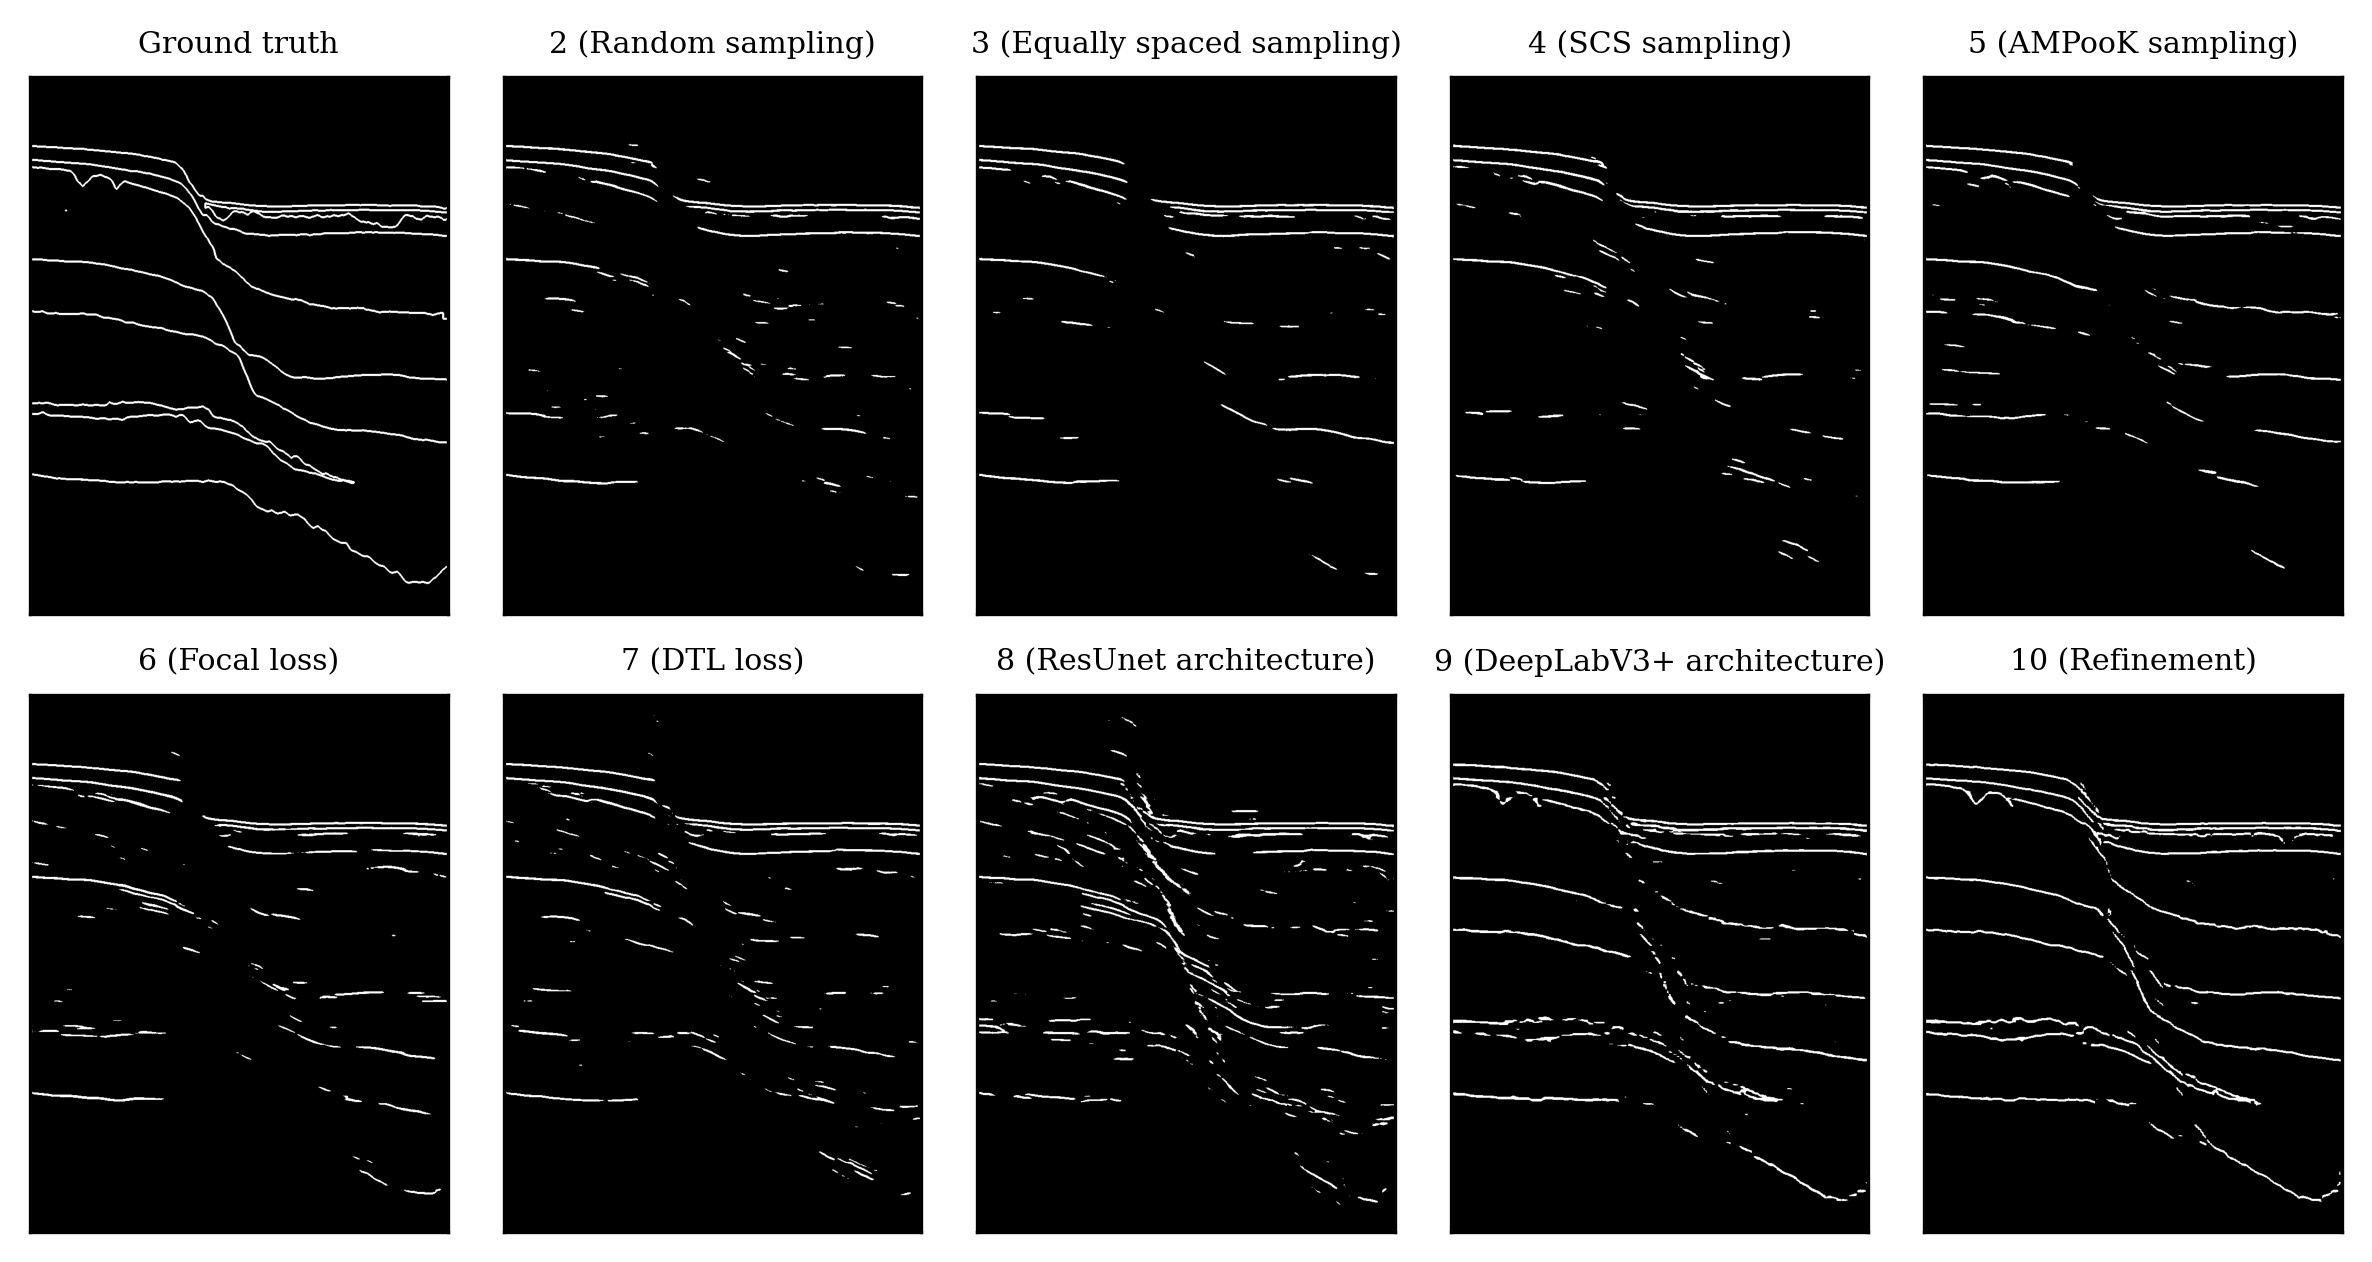

In [35]:
section = 435

experiments = ['2a', '3d', '4e', '5b', '6a', '7a', '8a', '9d', '10c']
plots_titles = [
    "Ground truth",
    "2 (Random sampling)",
    "3 (Equally spaced sampling)",
    "4 (SCS sampling)",
    "5 (AMPooK sampling)",
    "6 (Focal loss)",
    "7 (DTL loss)",
    "8 (ResUnet architecture)",
    "9 (DeepLabV3+ architecture)",
    "10 (Refinement)"
]

data_file =  '/pgeoprj/godeep/ewac_2/seismic_patterns/datasets/public_real_data/parihaka_boundaries.npy'
data = np.load(data_file, mmap_mode='r')
data = data[section, :, :].T
data_to_plot.append(data)
data_to_plot = [data]
for exp in experiments:
    data_file = f'/pgeoprj/godeep/ewac_2/seismic_patterns/datasets/models_predictions/parihaka_{exp}_boundaries_prediction.npy'
    data = np.load(data_file, mmap_mode='r')
    data = data[section, :, :].T
    data_to_plot.append(data)

plot_steps(data_to_plot, plots_titles)